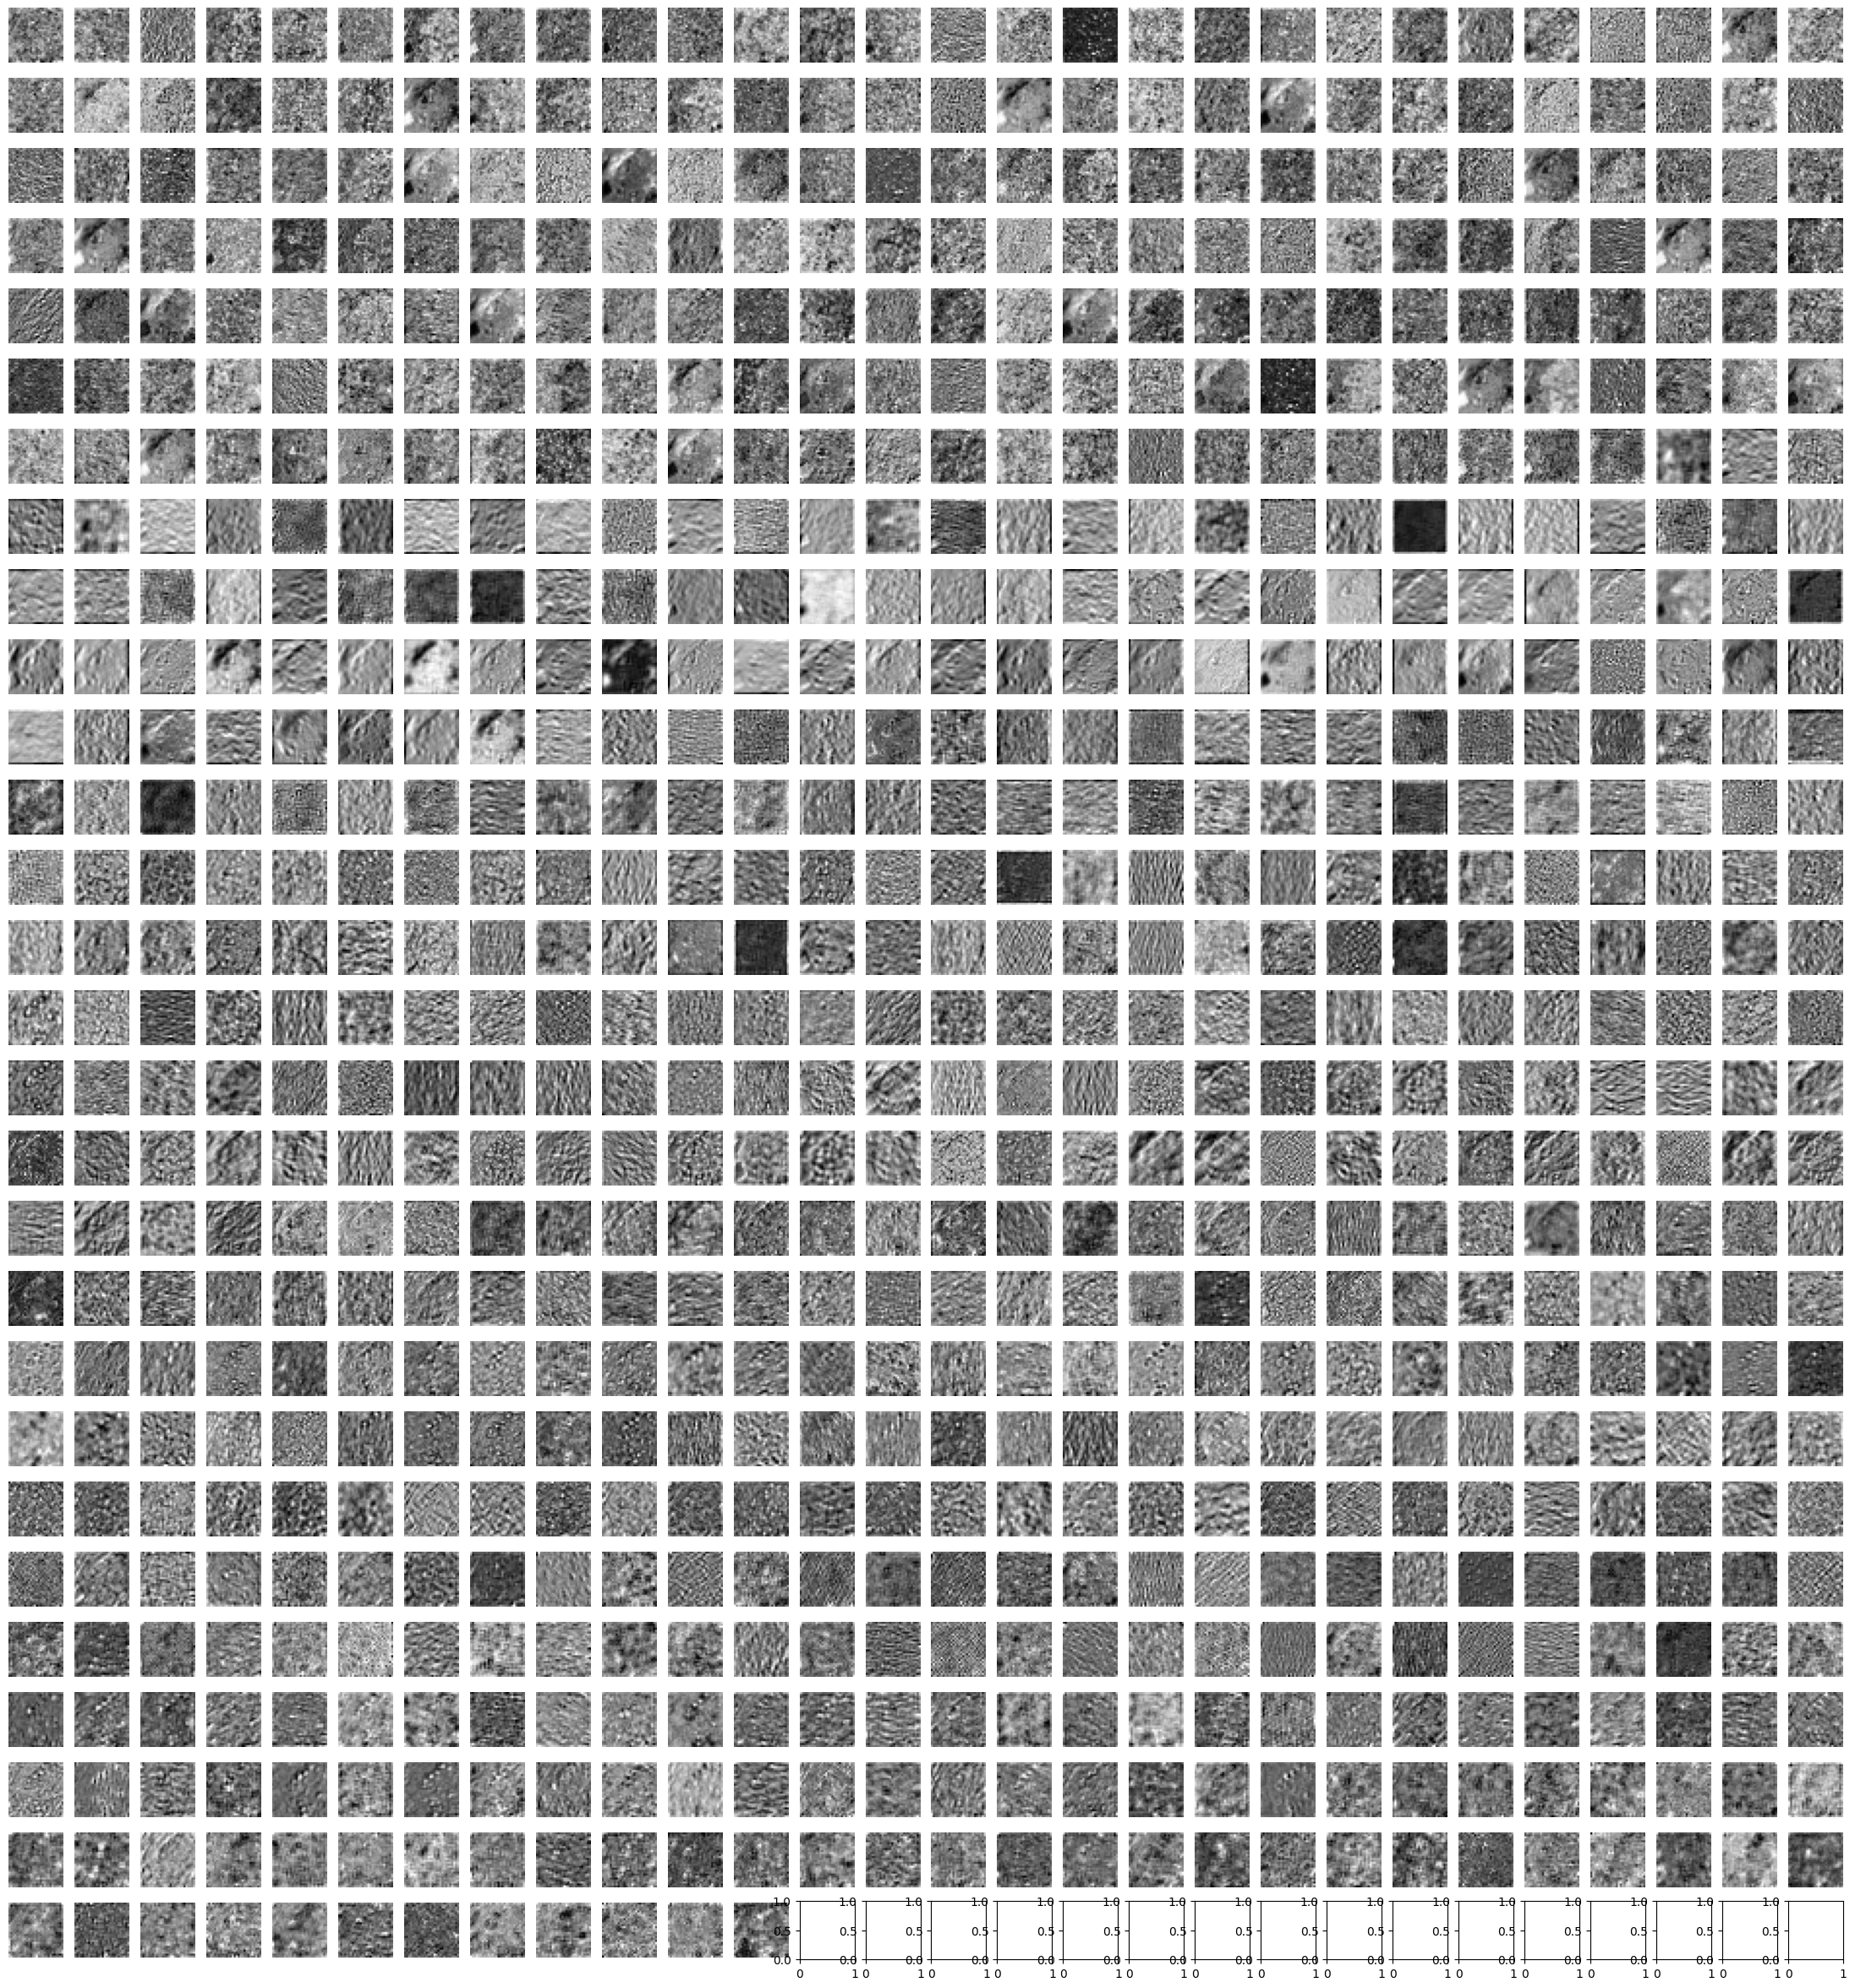

In [3]:
import os
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.models as models
import cv2 as cv


class DenseNet161():
    def __init__(self, weights='ImageNet', last_layer_ind=-5):
        
        if weights == 'ImageNet':
            pretrained_model = models.densenet161(pretrained=True)
        self.block = list(pretrained_model.children())[0]
        self.layer = self.block[0:last_layer_ind]
        
    def __str__(self):
        return 'densenet161'
    
    def describe(self, image_path):
        # Requires image to be Pillow.

        # Load the image and apply the necessary transformations
        image = Image.open(image_path).convert('RGB')
        transform = transforms.Compose([
                transforms.Resize(256),
                transforms.CenterCrop(224),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])
        image = transform(image)
        image = image.unsqueeze(0)  # Add batch dimension

        model = nn.Sequential(*self.layer)
        model.eval()
        with torch.no_grad():
                features = model(image)

        return features.squeeze()


if __name__ == "__main__":
    image_path = "C:/Users/hadil/Documents/projects/Machine Learning/project/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/40X/SOB_B_A-14-22549AB-40-001.png"
    pretrained_model = models.densenet161(pretrained=True)

    pass

obj = DenseNet161('ImageNet',-5)
obj.describe(image_path)
features = obj.describe(image_path)

# Create a 16x32 grid of subplots (to fit all 512 features)
fig, axs = plt.subplots(nrows=28, ncols=28, figsize=(28, 30))

# Loop over the features and plot each one as an image in a subplot
for i in range(len(features)):
    row = i // 28
    col = i % 28
    axs[row, col].imshow(features[i], cmap='gray')
    axs[row, col].axis('off')

# Show the plot
plt.show()

In [2]:
print(pretrained_model)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel